In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import sklearn.metrics as skm
import statsmodels.api as sm

In [3]:
plt.rcParams["figure.figsize"] = (15, 3)

In [4]:
soy_data = [pd.read_csv(f'../data/futures_{year}.csv', index_col=0) for year in range(2020, 2023)]
weather_data = [pd.read_csv(f'../data/weather_{year}.csv', index_col=0) for year in range(2020, 2023)]

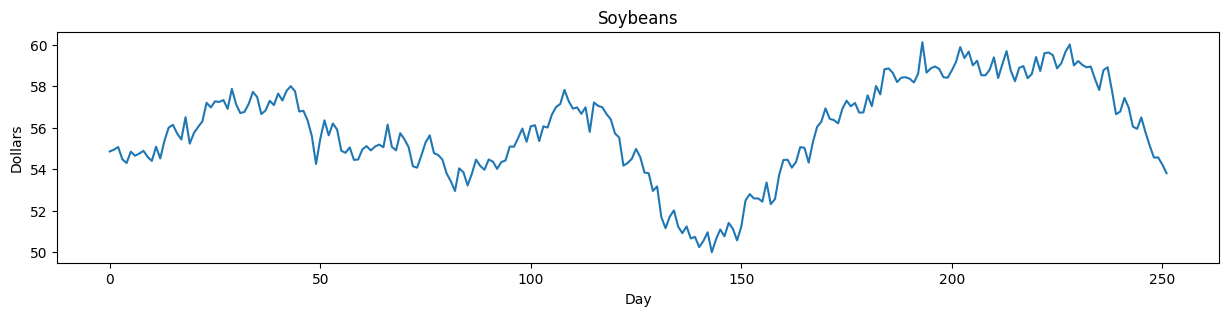

In [5]:
plt.xlabel('Day')
plt.ylabel('Dollars')
plt.title('Soybeans')
plt.plot(range(252), soy_data[2]['SBL'])
plt.show()

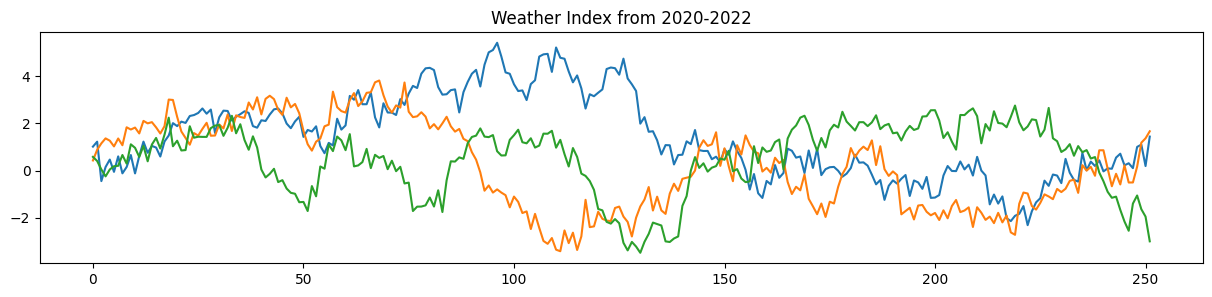

In [6]:
plt.title('Weather Index from 2020-2022')
for _, df in enumerate(weather_data):
    plt.plot(range(252), df['weather'])

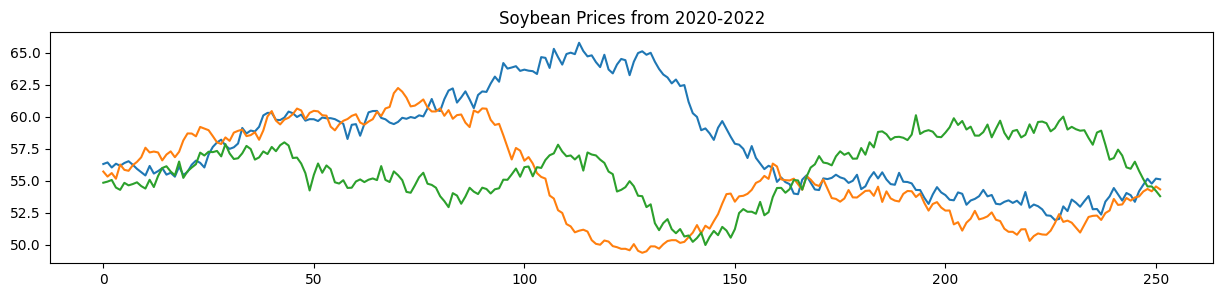

In [7]:
plt.title('Soybean Prices from 2020-2022')
for _, df in enumerate(soy_data):
    plt.plot(range(252), df['SBL'])

In [8]:
adf_vals = [adfuller(x['SBL']) for x in soy_data]

In [9]:
adf_vals[0]

(-0.7248099569814116,
 0.8402181197532936,
 2,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 389.2976064555561)

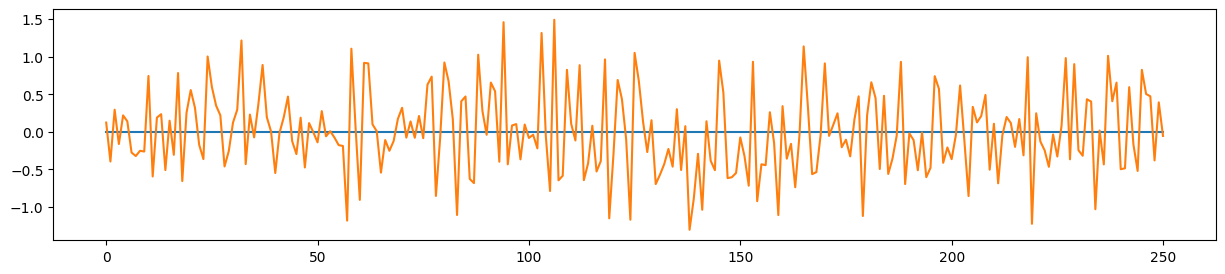

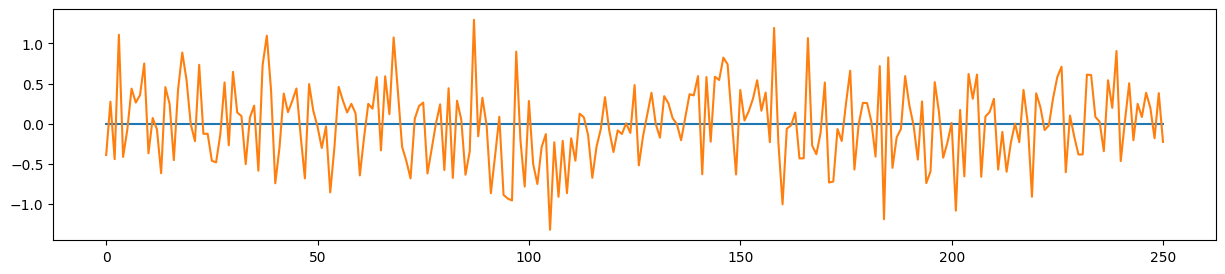

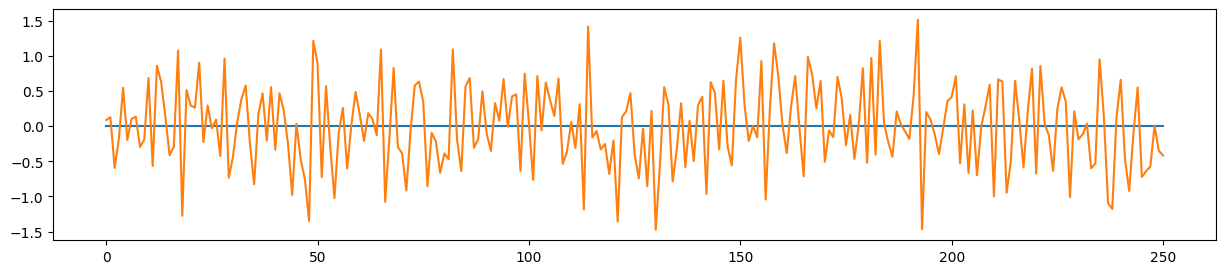

In [10]:
d1 = [np.diff(x['SBL'], n=1) for x in soy_data]

for d in d1:
    plt.plot(range(len(d)), [d.mean()] * len(d))
    plt.plot(range(len(d)), d)
    plt.show()

In [11]:
d1_adf = [adfuller(d) for d in d1]
d1_adf

[(-13.924478642500349,
  5.22328880820455e-26,
  1,
  249,
  {'1%': -3.4568881317725864,
   '5%': -2.8732185133016057,
   '10%': -2.5729936189738876},
  386.78351301314694),
 (-16.134558166805878,
  4.7462865940269564e-29,
  0,
  250,
  {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544},
  324.42395417046566),
 (-1.9954529753728605,
  0.288570363096913,
  10,
  240,
  {'1%': -3.4578942529658563,
   '5%': -2.8736593200231484,
   '10%': -2.573228767361111},
  393.5711844283521)]

In [12]:
d2 = [np.diff(d, n=1) for d in d1]
d2_adf = [adfuller(d) for d in d2]
d2_adf

[(-9.548156435471654,
  2.615199289245875e-16,
  10,
  239,
  {'1%': -3.458010773719797,
   '5%': -2.8737103617125186,
   '10%': -2.5732559963936206},
  394.6327941071199),
 (-8.499585490137122,
  1.2487834775533883e-13,
  11,
  238,
  {'1%': -3.458128284586202,
   '5%': -2.873761835239286,
   '10%': -2.5732834559706235},
  330.80687524685743),
 (-11.380494305656361,
  8.53506941865544e-21,
  9,
  240,
  {'1%': -3.4578942529658563,
   '5%': -2.8736593200231484,
   '10%': -2.573228767361111},
  392.8378126326588)]

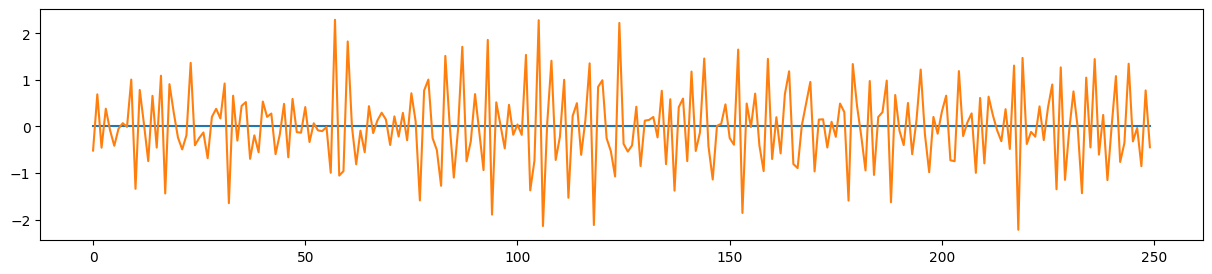

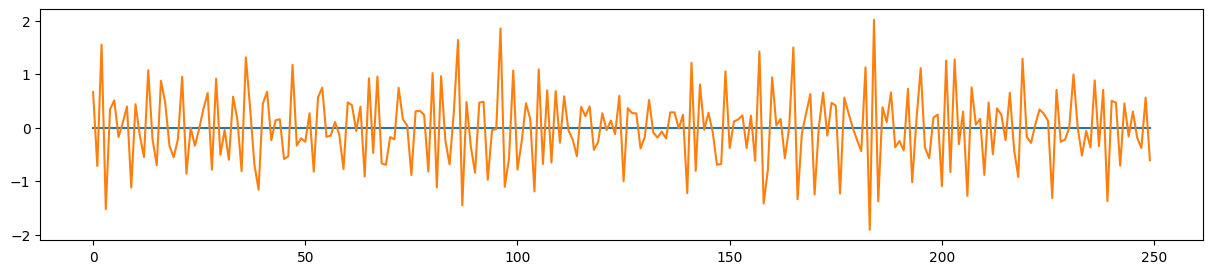

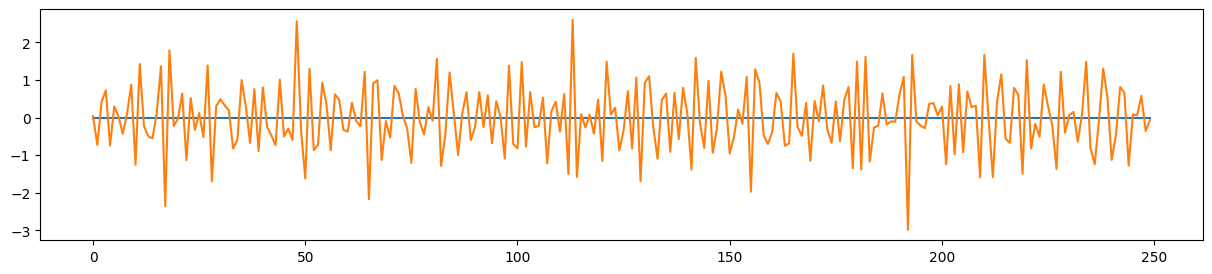

In [13]:
for d in d2:
    plt.plot(range(len(d)), [d.mean()] * len(d))
    plt.plot(range(len(d)), d)
    plt.show()

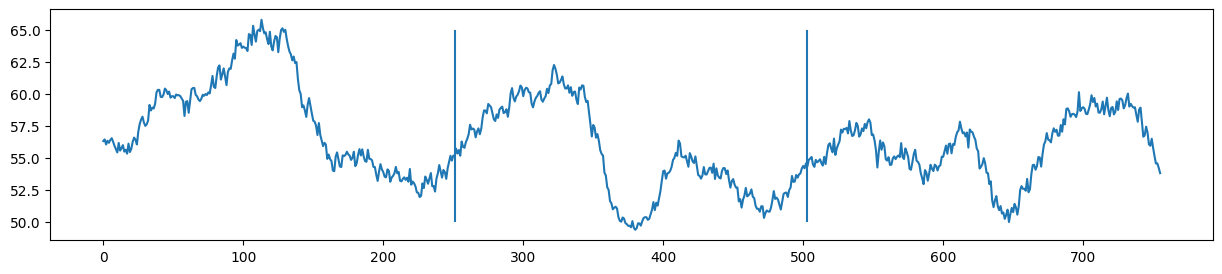

In [33]:
full_data = pd.concat([soy_data[0]['SBL'], soy_data[1]['SBL'], soy_data[2]['SBL']]).to_numpy()
full_w = pd.concat([weather_data[0]['weather'], weather_data[1]['weather'], weather_data[2]['weather']])
plt.vlines(x=[251, 503], ymin=50, ymax=65)

plt.plot(range(len(full_data)), full_data)

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(full_data, model="additive", period=252)

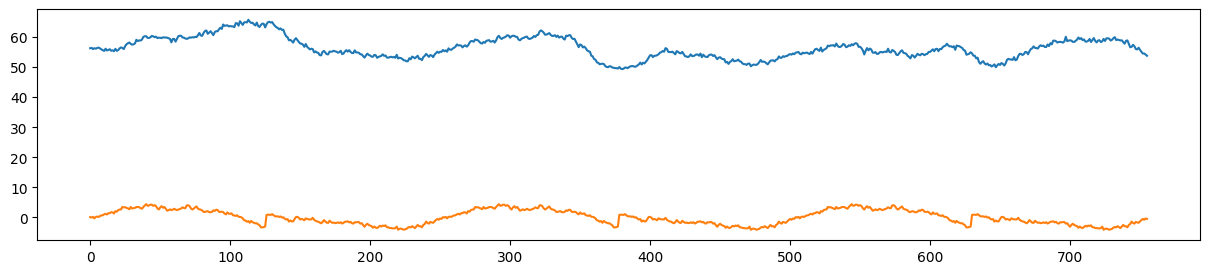

In [48]:
plt.plot(decomp.observed)
# plt.plot(decomp.trend)
# plt.plot(decomp.resid)
plt.plot(decomp.seasonal)

# SARIMAX

In [16]:
import pmdarima as pm
from pmdarima import model_selection, pipeline, preprocessing as ppc, arima

In [17]:
train, test = model_selection.train_test_split(full_data, train_size=600)
wtrain, wtest = model_selection.train_test_split(full_w, train_size=600)

In [18]:
strain = train.to_numpy().reshape(-1, 1)
stest = test.to_numpy().reshape(-1, 1)
wtrain = wtrain.to_numpy().reshape(-1, 1)
wtest = wtest.to_numpy().reshape(-1, 1)

In [19]:
model = arima.AutoARIMA(stepwise=False, n_jobs=2, trace=1, error_action="ignore",
                              suppress_warnings=True, d=1, D=0)

In [20]:
model.fit(strain, wtrain)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=923.449, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=919.422, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=918.482, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=916.816, Time=0.20 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=916.532, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=920.486, Time=0.12 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=918.531, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=920.335, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=919.272, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=903.012, Time=0.77 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=916.672, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=918.071, Time=0.28 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=904.801, Time=1.15 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=918.022, Time=0.54 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=917.265, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[1] i

AutoARIMA(D=0, d=1, error_action='ignore', n_jobs=2, stepwise=False, trace=1)

In [21]:
pred_len = 1
preds = []

for i in range(len(test)):
    pred = model.predict(n_periods=pred_len, X=wtest[i:i+pred_len])
    preds.append(pred[0])
    model.update(test[i:i+pred_len], X=wtest[i:i+pred_len])


In [22]:
len(test)

156

In [23]:
len(preds)

156

(575.0, 792.75)

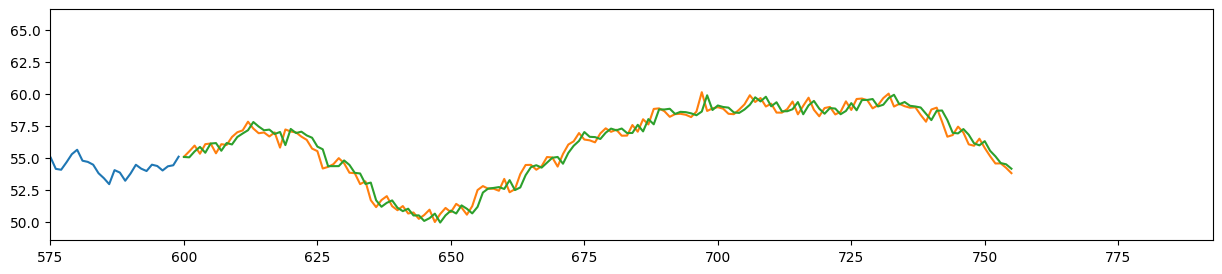

In [24]:
plt.plot(range(len(strain)), strain)
plt.plot(range(len(strain), len(stest) + len(strain)), stest)
plt.plot(range(len(strain), len(stest) + len(strain)), preds)
plt.xlim(left=575)

In [25]:
skm.mean_squared_error(stest, preds)

0.32496104364952805

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX